In [3]:
import requests as r
import json
import pickle
from tqdm import tqdm
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bs4

In [52]:
def captureUp(uid):
    """
    uid up主空间id
    """
    url="https://api.bilibili.com/x/space/arc/search?mid={}&ps=30&tid=0&pn={}&keyword=&order=pubdate&jsonp=jsonp"
    DATA=[]
    #print("爬取中")
    for i in range(1,13000):
        try:
            #time.sleep(random.randint(3,20))
            text = r.get(url.format(uid,i)).text
        except:
            time.sleep(30)
            text = r.get(url.format(i)).text
        data = json.loads(text)
        DATA+=data["data"]["list"]["vlist"]
        if data["data"]["page"]["count"]/30 >int(data["data"]["page"]["count"]/30):
            pc= int(data["data"]["page"]["count"]/30)+1
        else:
            pc= data["data"]["page"]["count"]/30
        if data["data"]["page"]["pn"]==pc:  
            with open("观察者网json.pkl","wb") as f:
                f.write(pickle.dumps(DATA))
            #print("爬取成功")
            return DATA

DATA = captureUp(13544375)

In [48]:
def data2df(DATA):
    descriptions=[]
    authors=[]
    titles=[]
    createds=[]
    lengths=[]
    comments=[]
    plays=[]
    aids=[]
    for i in DATA:
        descriptions.append(i["description"])
        authors.append(i["author"])
        titles.append(i["title"])
        createds.append(i["created"])
        lengths.append(i["length"])
        comments.append(i["comment"])
        plays.append(i["play"])
        aids.append(i["aid"])
    df = pd.DataFrame({"aid":aids,"title":titles,"author":authors,"description":descriptions,"comment":comments,"play":plays,"created":createds,"length":lengths})
    return df
df = data2df(DATA)

<AxesSubplot:>

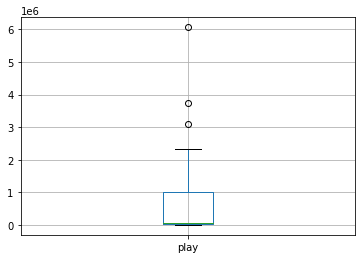

In [49]:
df=df.dropna()
df.boxplot(column=['play'])

In [50]:
print(np.mean([i for i in plays if type(i)==type(0)]))
print(np.max([i for i in plays if type(i)==type(0)]))
print(np.min([i for i in plays if type(i)==type(0)]))

680965.2452830189
6064176
2103


In [ ]:
#绘制播放量折线图
datax = [i for i in plays if type(i)==type(0)]
higher_q=np.quantile(datax,0.98,interpolation='higher')#上四分位数
datax = [i for i in plays if type(i)==type(0) and higher_q>i]
datay = [i for i in range(len(datax))]
# plt.scatter(datay,datax)
# plt.boxplot(datax)
plt.figure(figsize=(320, 8))
# plt.plot(datay,datax)
# plt.plot([np.mean(datax) for i in datax])
# plt.plot([np.quantile(datax,0.25,interpolation='higher') for i in datax])
# plt.plot([np.quantile(datax,0.75,interpolation='higher') for i in datax])


In [ ]:
#上下四分位 播放评论筛选
df[df["comment"]>np.quantile(df["comment"],0.75,interpolation='higher')]
df[df["play"]<np.quantile(df["play"],0.25,interpolation='higher')]

In [35]:
#抓取排行榜
hot_index_url = "https://www.bilibili.com/v/popular/rank/rookie"
html = r.get(hot_index_url).text
soup = bs4.BeautifulSoup(html)
#获取up主id
uid_list=[]
for i in soup.find_all("li",class_="rank-item"):
    uid = i.find_all("a")[2].get_attribute_list("href")[0].split("/")[-1]
    uid_list.append(uid)

In [53]:
d=[]
for i in tqdm(uid_list):
    DATA = captureUp(i)
    df = data2df(DATA)
    d.append(df.describe())




  0%|                                                                                                               | 0/100 [00:00<?, ?it/s]


  1%|█                                                                                                      | 1/100 [00:01<02:08,  1.30s/it]


  2%|██                                                                                                     | 2/100 [00:01<01:37,  1.00it/s]


  3%|███                                                                                                    | 3/100 [00:01<01:17,  1.25it/s]


  4%|████                                                                                                   | 4/100 [00:02<01:02,  1.54it/s]


  5%|█████▏                                                                                                 | 5/100 [00:02<00:52,  1.82it/s]


  6%|██████▏                                                                                                | 6/100 [00:02<00:44,  2.10it/s

 53%|██████████████████████████████████████████████████████                                                | 53/100 [00:58<00:51,  1.09s/it]


 54%|███████████████████████████████████████████████████████                                               | 54/100 [00:59<00:46,  1.02s/it]


 55%|████████████████████████████████████████████████████████                                              | 55/100 [00:59<00:35,  1.27it/s]


 56%|█████████████████████████████████████████████████████████                                             | 56/100 [00:59<00:28,  1.57it/s]


 57%|██████████████████████████████████████████████████████████▏                                           | 57/100 [00:59<00:22,  1.92it/s]


 58%|███████████████████████████████████████████████████████████▏                                          | 58/100 [01:00<00:19,  2.19it/s]


 59%|████████████████████████████████████████████████████████████▏                                         | 59/100 [01:01<00:30,  1.36it/s]



In [55]:
d

[               aid   comment        play       created
 count          1.0       1.0         1.0  1.000000e+00
 mean   800760067.0  216068.0  12515001.0  1.609385e+09
 std            NaN       NaN         NaN           NaN
 min    800760067.0  216068.0  12515001.0  1.609385e+09
 25%    800760067.0  216068.0  12515001.0  1.609385e+09
 50%    800760067.0  216068.0  12515001.0  1.609385e+09
 75%    800760067.0  216068.0  12515001.0  1.609385e+09
 max    800760067.0  216068.0  12515001.0  1.609385e+09,
                 aid      comment          play       created
 count  3.000000e+00     3.000000  3.000000e+00  3.000000e+00
 mean   8.433724e+08  1534.333333  8.994483e+05  1.609560e+09
 std    4.247863e+07  1735.068971  1.333700e+06  8.639950e+04
 min    8.008582e+08   442.000000  1.067000e+05  1.609474e+09
 25%    8.221509e+08   534.000000  1.295495e+05  1.609517e+09
 50%    8.434436e+08   626.000000  1.523990e+05  1.609560e+09
 75%    8.646295e+08  2080.500000  1.295822e+06  1.609603e+09

In [38]:
captureUp(uid_list[0])

爬取中


KeyboardInterrupt: 

2026561407